#### EDA and fillna with ROLLING MEAN and BACKFILL


In [1]:
import pandas as pd

import numpy as np

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller

from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf

C:\Users\csnaik\anaconda3\envs\tf_rani\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
 df = pd.read_excel('Sample Commodities_Vegetables_Hyderabad_Market.xlsx',
                    sheet_name="Potato",parse_dates =["Date"], index_col ='Date')
df.head(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2017-04-25,Potato,50,1200.0,1200,1200,Private Traders
2017-04-28,Potato,65,1000.0,1000,1000,Private Traders


In [4]:
df.tail(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2019-12-29,Potato,5,2200.0,2000,2100,Private Traders
2019-12-30,Potato,75,2000.0,2000,2000,Private Traders


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2017-04-25 to 2019-12-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variety Name    732 non-null    object 
 1   Arrivals(Qtls)  732 non-null    int64  
 2   Maximum         731 non-null    float64
 3   Minimum         732 non-null    int64  
 4   Model           732 non-null    int64  
 5   Purchase by     732 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
df.isnull().sum()

Variety Name      0
Arrivals(Qtls)    0
Maximum           1
Minimum           0
Model             0
Purchase by       0
dtype: int64

In [7]:
df.describe()

,Arrivals(Qtls),Maximum,Minimum,Model
count,732.000000,731.000000,732.00000,7.320000e+02
mean,50.595628,1354.664843,1272.84153,2.657698e+03
std,43.101101,746.140198,365.42704,3.692118e+04
min,5.000000,180.000000,100.00000,1.000000e+02
25%,20.000000,1000.000000,1000.00000,1.000000e+03
50%,38.000000,1200.000000,1200.00000,1.200000e+03
75%,70.000000,1550.000000,1500.00000,1.500000e+03
max,320.000000,16000.000000,3000.00000,1.000165e+06


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

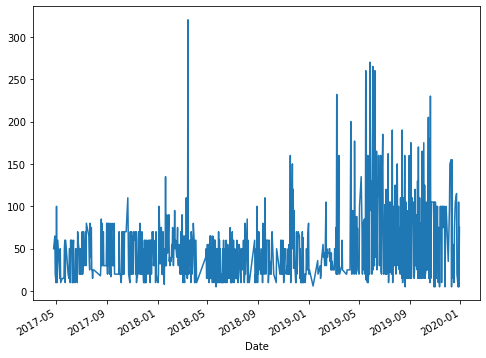

In [9]:
df['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

In [11]:
dt = pd.date_range(start ='25-04-2017', end ='30-12-2019', freq ='D' )
dt

DatetimeIndex(['2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30', '2017-05-01', '2017-05-02',
               '2017-05-03', '2017-05-04',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', length=980, freq='D')

In [12]:
df.tail()

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2019-12-24,Potato,20,1600.0,1500,1550,Private Traders
2019-12-27,Potato,5,2400.0,2400,2400,Private Traders
2019-12-28,Potato,105,2200.0,2000,2100,Private Traders
2019-12-29,Potato,5,2200.0,2000,2100,Private Traders
2019-12-30,Potato,75,2000.0,2000,2000,Private Traders


In [13]:
df = df[~df.index.duplicated()]

In [14]:
df1 = pd.DataFrame(columns=['Arrivals(Qtls)'],data=df, index = dt)
df1.head(10)

,Arrivals(Qtls)
2017-04-25,50.0
2017-04-26,NaN
2017-04-27,NaN
2017-04-28,65.0
2017-04-29,20.0
2017-04-30,NaN
2017-05-01,10.0
2017-05-02,100.0
2017-05-03,10.0
2017-05-04,NaN


In [15]:
df1.isnull().sum()

Arrivals(Qtls)    248
dtype: int64

In [16]:
df1 = df1.fillna(df1.rolling(22,min_periods=1).mean())

In [17]:
df1.isnull().sum()

Arrivals(Qtls)    0
dtype: int64

#### the null values are filled after 22 datapoints

In [18]:
df1.value_counts()

Arrivals(Qtls)
20.000000         116
10.000000          77
50.000000          58
60.000000          56
30.000000          54
                 ... 
41.307692           1
41.333333           1
41.428571           1
41.923077           1
320.000000          1
Length: 238, dtype: int64

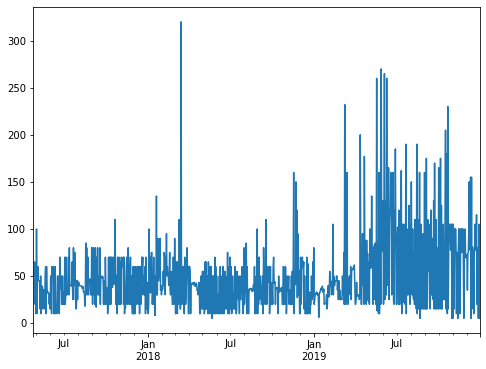

In [19]:
df1['Arrivals(Qtls)'].plot(figsize=(8,6))
plt.show()

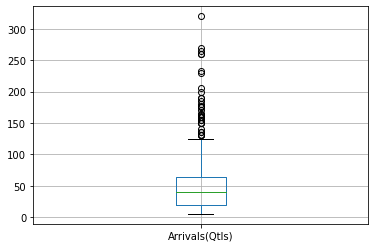

In [20]:
df1.boxplot()
plt.show()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 2017-04-25 to 2019-12-30
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrivals(Qtls)  980 non-null    float64
dtypes: float64(1)
memory usage: 15.3 KB


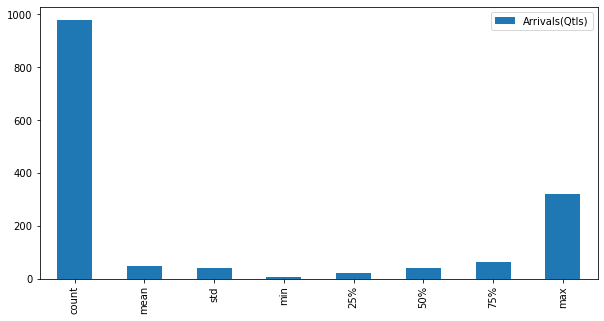

In [22]:
df1.describe().plot.bar(figsize=(10,5))
plt.show()

In [23]:
q1= df1.quantile(0.25)
q3 = df1.quantile(0.75)
qmax= df1.quantile(0.99)
q1,q3,qmax

(Arrivals(Qtls)    20.0
 Name: 0.25, dtype: float64,
 Arrivals(Qtls)    63.45
 Name: 0.75, dtype: float64,
 Arrivals(Qtls)    190.0
 Name: 0.99, dtype: float64)

In [24]:
for i in range(len(df1)):
    if df1['Arrivals(Qtls)'][i] >=300.0:
        print(df1['Arrivals(Qtls)'][i])
        df1['Arrivals(Qtls)'][i] = qmax

320.0


In [25]:
df1.describe()

,Arrivals(Qtls)
count,980.000000
mean,48.814345
std,37.338845
min,5.000000
25%,20.000000
50%,40.000000
75%,63.450000
max,270.000000


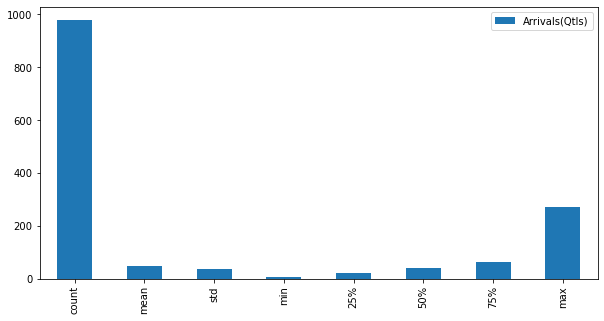

In [26]:
df1.describe().plot.bar(figsize=(10,5))
plt.show()

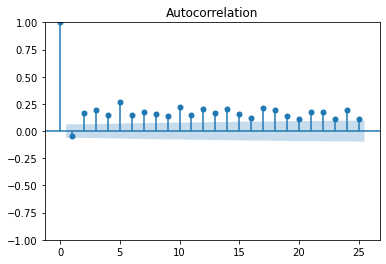

In [27]:
plot_acf(df1, lags =25)
plt.show()

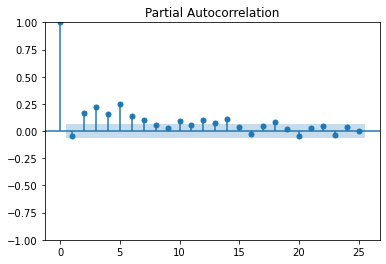

In [28]:
plot_pacf(df1,lags =25)
plt.show()

#### The plot for 200 datapoints ...~ 7 months

<Figure size 576x288 with 0 Axes>

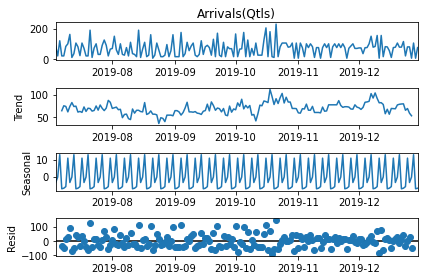

In [29]:
plt.figure(figsize=(8,4))
results = seasonal_decompose(df1['Arrivals(Qtls)'].iloc[800:1000])
results.plot();

#### DICKEY FULLER TEST for STATIONARITY

In [30]:
observations= df1.values
test_result = adfuller(observations)

In [31]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -2.527850
p-value: 0.108844
Critical Values:
	1%: -3.43717
	5%: -2.86455
	10%: -2.56837


##### USING AUTO TIMESERIES for selection of best model

In [32]:
#! pip install auto-ts

In [33]:
from auto_ts import auto_timeseries

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [34]:
df.head(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2017-04-25,Potato,50,1200.0,1200,1200,Private Traders
2017-04-28,Potato,65,1000.0,1000,1000,Private Traders


In [35]:
df.tail(2)

,Variety Name,Arrivals(Qtls),Maximum,Minimum,Model,Purchase by
Date,,,,,,
2019-12-29,Potato,5,2200.0,2000,2100,Private Traders
2019-12-30,Potato,75,2000.0,2000,2000,Private Traders


### Split the time series data into training and testing sets

In [36]:
train_end = datetime(2018,12,30)
test_end = datetime(2019,12,30)

In [37]:
train = df1[:train_end]
test = df1[train_end + timedelta(days =1): test_end]

In [38]:
train.shape,test.shape

((615, 1), (365, 1))

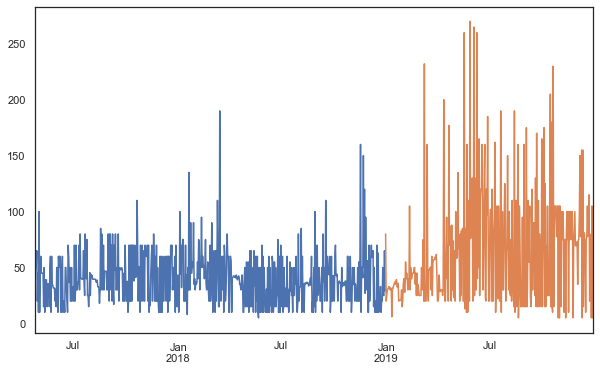

In [39]:
train['Arrivals(Qtls)'].plot(figsize=(10,6))
test['Arrivals(Qtls)'].plot(figsize=(10,6))
plt.show()

In [40]:
model = auto_timeseries(forecast_period =365,score_type='rmse',time_interval='D', non_seasonal_pdq=None, seasonality=False,
         model_type=['best'])

In [41]:
#### reshape train and test for model input

In [42]:
train.reset_index(inplace=True)
test.reset_index(inplace= True)

In [43]:
train.head(), test.head()

(       index  Arrivals(Qtls)
 0 2017-04-25            50.0
 1 2017-04-26            50.0
 2 2017-04-27            50.0
 3 2017-04-28            65.0
 4 2017-04-29            20.0,
        index  Arrivals(Qtls)
 0 2018-12-31       80.000000
 1 2019-01-01       20.000000
 2 2019-01-02       25.000000
 3 2019-01-03       29.894737
 4 2019-01-04       31.000000)

Start of Fit.....
    Target variable given as = Arrivals(Qtls)
Start of loading of data.....
    Inputs: ts_column = index, sep = ,, target = ['Arrivals(Qtls)']
    Using given input: pandas dataframe...
    index column exists in given train data...
    train data shape = (615, 1)
Alert: Could not detect strf_time_format of index. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 102 to enable cross_validation
Max. iterations usi

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4712.747, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4628.470, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4625.685, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4627.272, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4777.494, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=4627.638, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4627.669, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4875.661, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4626.411, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=4710.747, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=4626.470, Time=0.40 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 4.638 seconds

SARIMAX RMSE (all folds): 24.3785
SARIMAX Norm RMSE (all folds): 105%


-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    

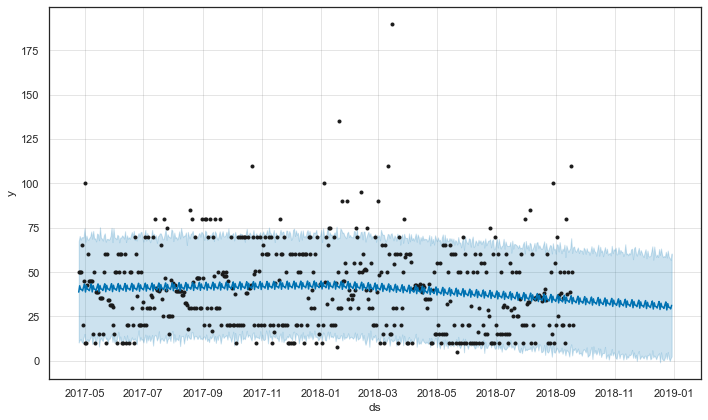

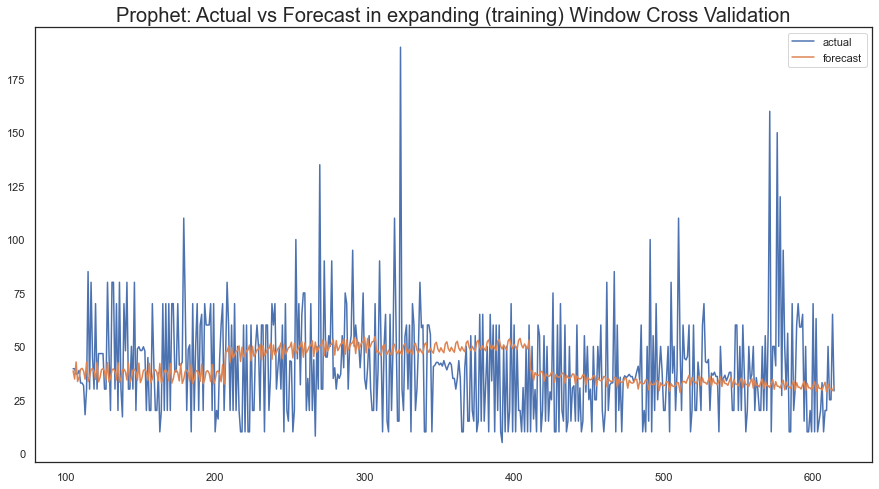

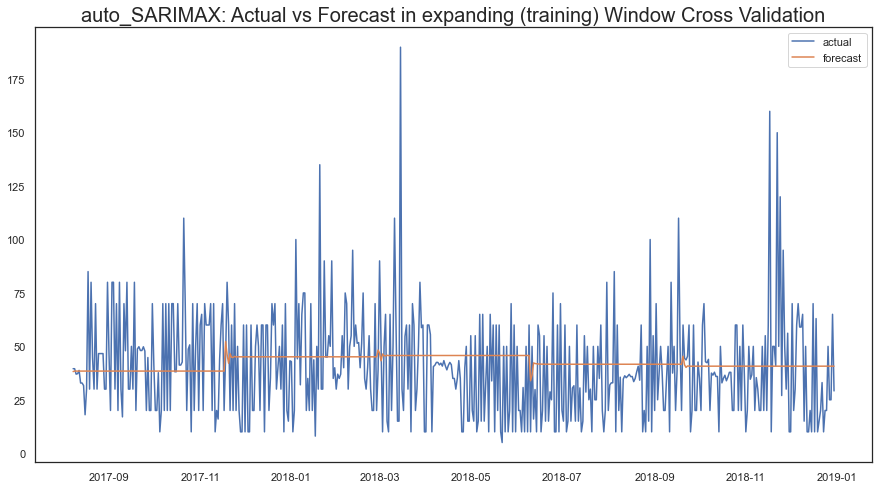

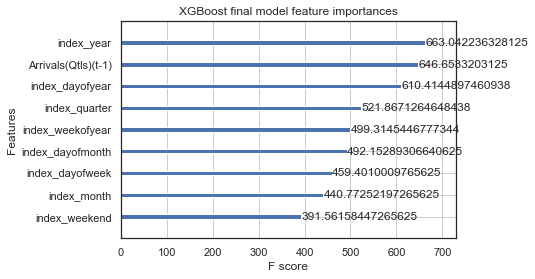

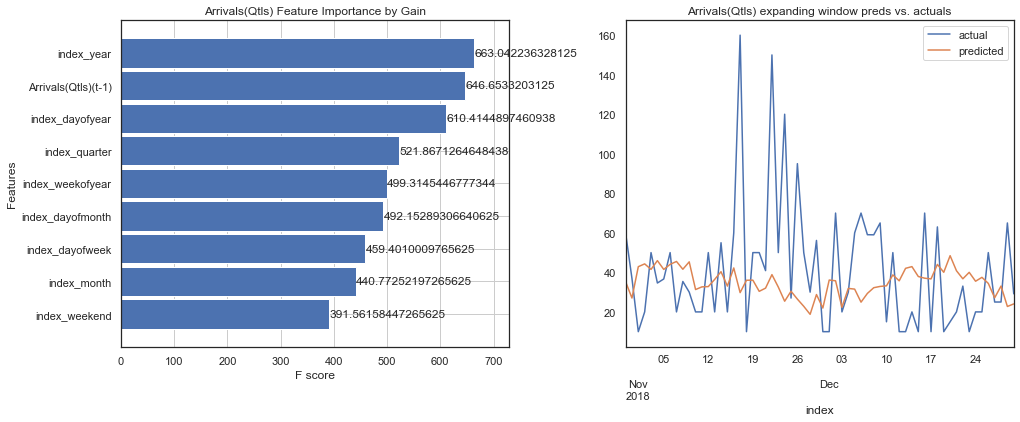

In [44]:
model.fit(traindata = train, ts_column ='index', target ='Arrivals(Qtls)')

In [45]:
future_pred = model.predict(testdata = test, model = 'best')

Predicting using test dataframe as input for auto_SARIMAX model


In [46]:
future_pred.values

array([[ 35.88209225,  24.54968874, -12.23441352,  83.99859801],
       [ 34.48637732,  24.79875637, -14.11829202,  83.09104667],
       [ 34.90474385,  24.95118647, -13.99868301,  83.80817071],
       ...,
       [ 99.94757671,  39.46330973,  22.60091093, 177.29424249],
       [100.22171863,  39.49621668,  22.8105564 , 177.63288086],
       [100.49637744,  39.52909624,  23.02077246, 177.97198242]])

In [47]:
future_pred.head(2)

Arrivals(Qtls),yhat,mean_se,mean_ci_lower,mean_ci_upper
2018-12-31,35.882092,24.549689,-12.234414,83.998598
2019-01-01,34.486377,24.798756,-14.118292,83.091047


In [49]:
test['ypred']=future_pred['yhat'].values

In [50]:
test.head(10)

,index,Arrivals(Qtls),ypred
0,2018-12-31,80.000000,35.882092
1,2019-01-01,20.000000,34.486377
2,2019-01-02,25.000000,34.904744
3,2019-01-03,29.894737,34.918991
4,2019-01-04,31.000000,35.024036
5,2019-01-05,31.647059,35.109454
6,2019-01-06,33.000000,35.199884
7,2019-01-07,30.533333,35.289828
8,2019-01-08,32.000000,35.380513
9,2019-01-09,29.615385,35.471664


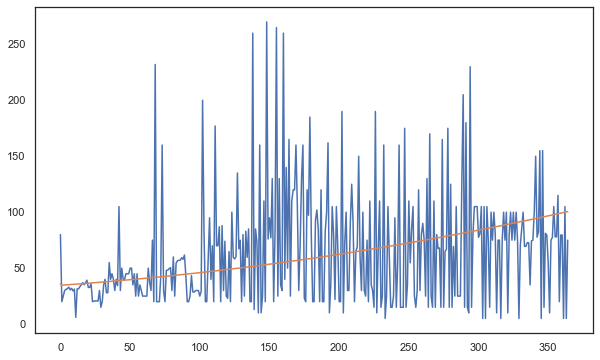

In [51]:
test['Arrivals(Qtls)'].plot(figsize=(10,6))
test['ypred'].plot(figsize=(10,6))
plt.show()

In [52]:
train.set_index('index', inplace = True)
train.head(2)

,Arrivals(Qtls)
index,
2017-04-25,50.0
2017-04-26,50.0


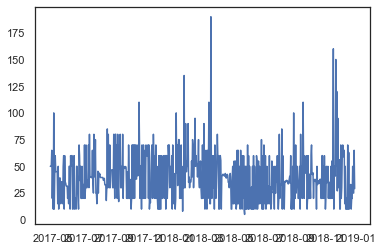

In [53]:
plt.plot(train['Arrivals(Qtls)'], label='Train')
plt.show()

In [54]:
test.set_index('index', inplace = True)
test.head(2)

,Arrivals(Qtls),ypred
index,,
2018-12-31,80.0,35.882092
2019-01-01,20.0,34.486377


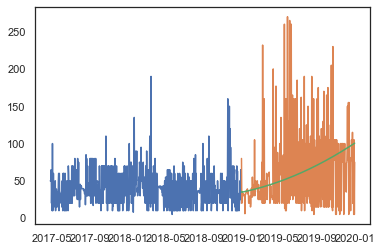

In [55]:
plt.plot(train['Arrivals(Qtls)'], label='Train')
plt.plot(test['Arrivals(Qtls)'], label='Test')
plt.plot(test['ypred'], label='Prediction')
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Arrivals(Qtls)'],test['ypred']))
print("ROOT MEAN SQAURED ERROR (RMSE) :",rmse)

ROOT MEAN SQAURED ERROR (RMSE) : 49.80915981788788


#### BACK FILL 

In [57]:
df2 = pd.DataFrame(columns=['Arrivals(Qtls)'],data=df, index = dt)
df2.head(10)

,Arrivals(Qtls)
2017-04-25,50.0
2017-04-26,NaN
2017-04-27,NaN
2017-04-28,65.0
2017-04-29,20.0
2017-04-30,NaN
2017-05-01,10.0
2017-05-02,100.0
2017-05-03,10.0
2017-05-04,NaN


In [58]:
df2.isnull().sum()

Arrivals(Qtls)    248
dtype: int64

In [59]:
df2 = df2.fillna(method ='bfill')

In [60]:
df2.isnull().sum()

Arrivals(Qtls)    0
dtype: int64

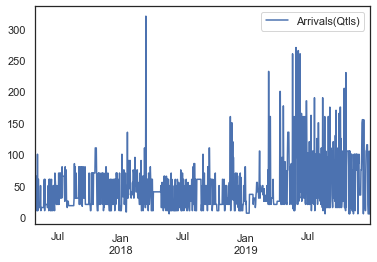

In [61]:
df2.plot()
plt.show()

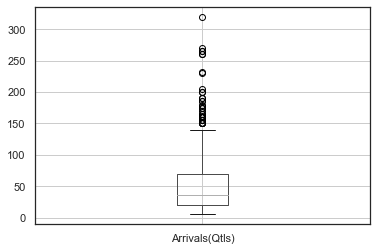

In [62]:
df2.boxplot()
plt.show()

In [63]:
q1= df2.quantile(0.25)
q3 = df2.quantile(0.75)
qmax= df2.quantile(0.99)
q1,q3,qmax

(Arrivals(Qtls)    20.0
 Name: 0.25, dtype: float64,
 Arrivals(Qtls)    70.0
 Name: 0.75, dtype: float64,
 Arrivals(Qtls)    200.0
 Name: 0.99, dtype: float64)

In [65]:
for i in range(len(df2)):
    if df2['Arrivals(Qtls)'][i] >=300.0:
        print(df2['Arrivals(Qtls)'][i])
        df2['Arrivals(Qtls)'][i] = qmax

320.0


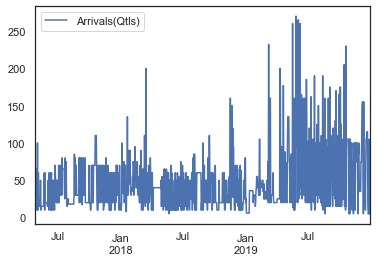

In [66]:
df2.plot()
plt.show()

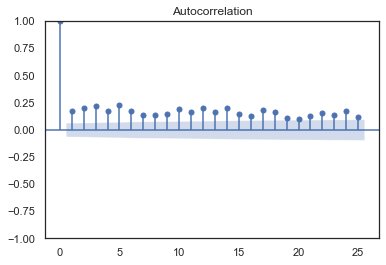

In [67]:
plot_acf(df2, lags =25)
plt.show()

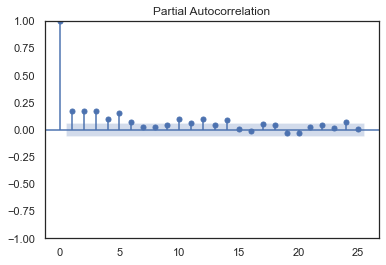

In [68]:
plot_pacf(df2,lags =25)
plt.show()

#### The plot for 200 datapoints ...~ 7 months

<Figure size 576x288 with 0 Axes>

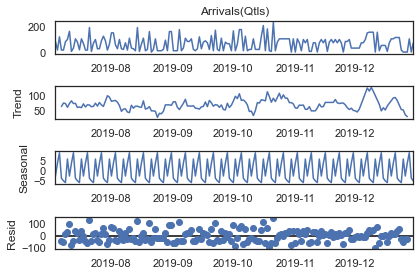

In [69]:
plt.figure(figsize=(8,4))
results = seasonal_decompose(df2['Arrivals(Qtls)'].iloc[800:1000])
results.plot();

#### DICKEY FULLER TEST for STATIONARITY

In [70]:
observations= df2.values
test_result = adfuller(observations)

In [71]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -4.051041
p-value: 0.001166
Critical Values:
	1%: -3.43714
	5%: -2.86454
	10%: -2.56837


In [72]:
train1 = df1[:train_end]
test1 = df1[train_end + timedelta(days =1): test_end]

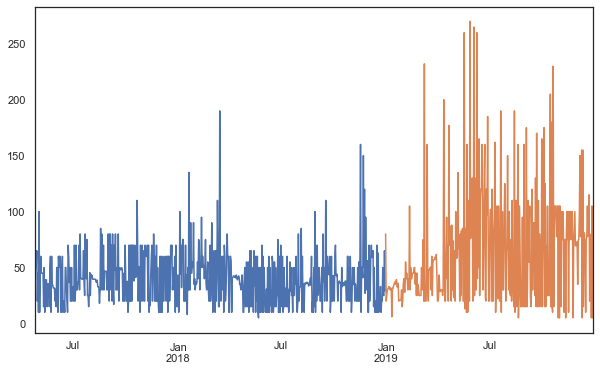

In [73]:
train1['Arrivals(Qtls)'].plot(figsize=(10,6))
test1['Arrivals(Qtls)'].plot(figsize=(10,6))
plt.show()

In [74]:
train1.reset_index(inplace=True)
test1.reset_index(inplace= True)

In [75]:
model1 = auto_timeseries(forecast_period =365,score_type='rmse',time_interval='D', non_seasonal_pdq=None, seasonality=False,
         model_type=['best'])

Start of Fit.....
    Target variable given as = Arrivals(Qtls)
Start of loading of data.....
    Inputs: ts_column = index, sep = ,, target = ['Arrivals(Qtls)']
    Using given input: pandas dataframe...
    index column exists in given train data...
    train data shape = (615, 1)
Alert: Could not detect strf_time_format of index. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 102 to enable cross_validation
Max. iterations usi

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4712.747, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4628.470, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4625.685, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4627.272, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4777.494, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=4627.638, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4627.669, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4875.661, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4626.411, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=4710.747, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=4626.470, Time=0.27 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 4.531 seconds

SARIMAX RMSE (all folds): 24.3785
SARIMAX Norm RMSE (all folds): 105%


-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    

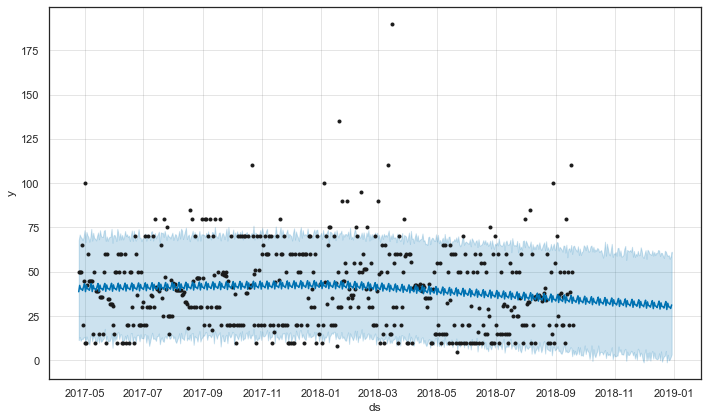

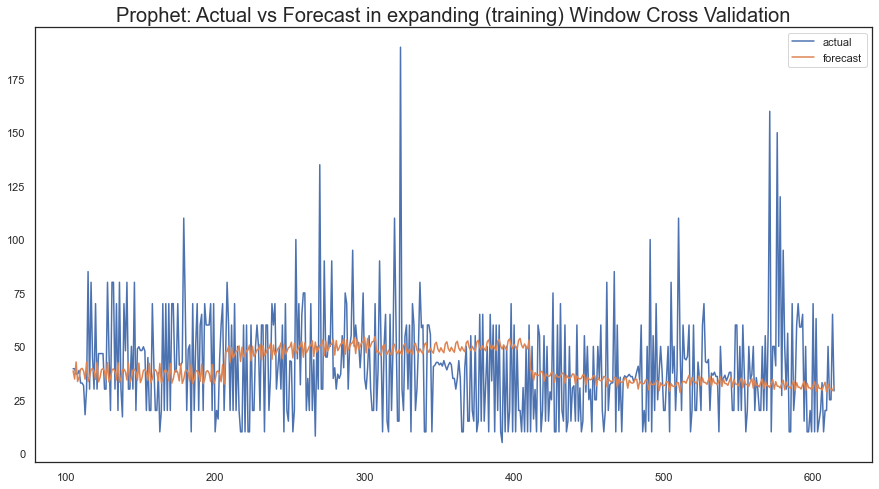

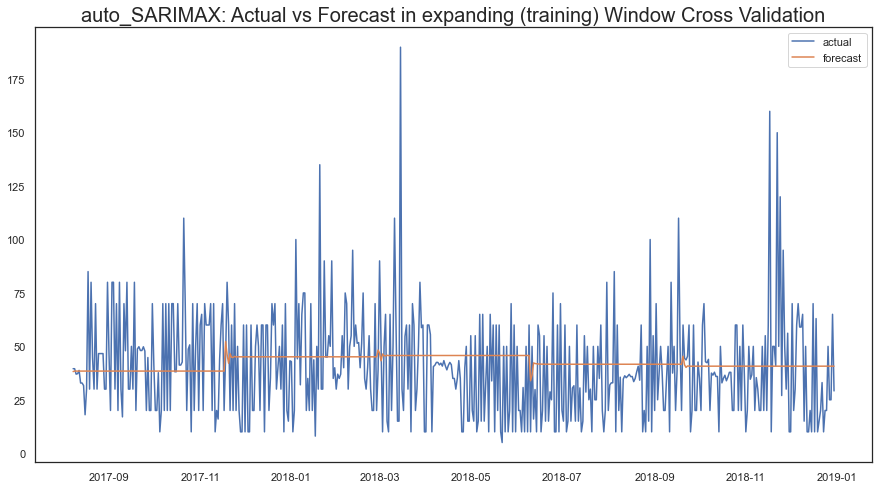

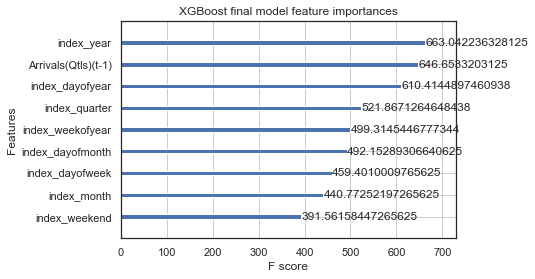

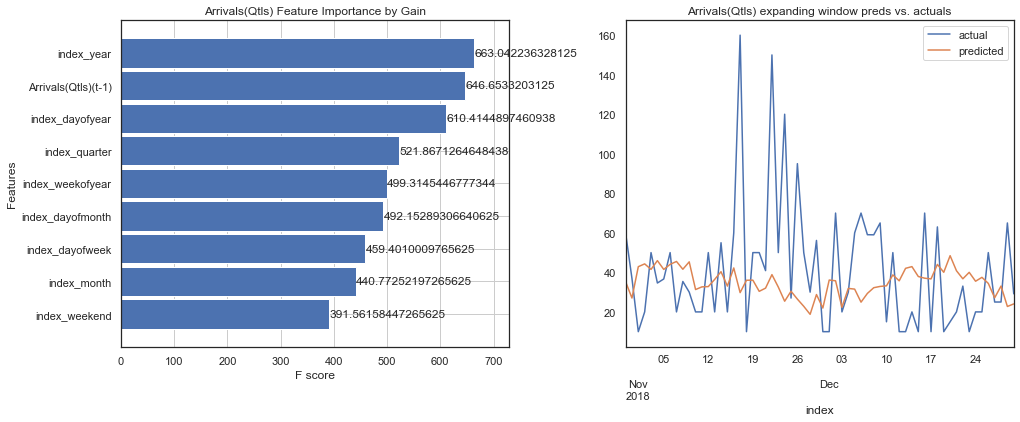

In [76]:
model1.fit(traindata = train1, ts_column ='index', target ='Arrivals(Qtls)')

In [77]:
future_pred = model1.predict(testdata = test1, model = 'best')

Predicting using test dataframe as input for auto_SARIMAX model


In [78]:
future_pred.head(2)

Arrivals(Qtls),yhat,mean_se,mean_ci_lower,mean_ci_upper
2018-12-31,35.882092,24.549689,-12.234414,83.998598
2019-01-01,34.486377,24.798756,-14.118292,83.091047


In [80]:
test1['ypred']=future_pred['yhat'].values

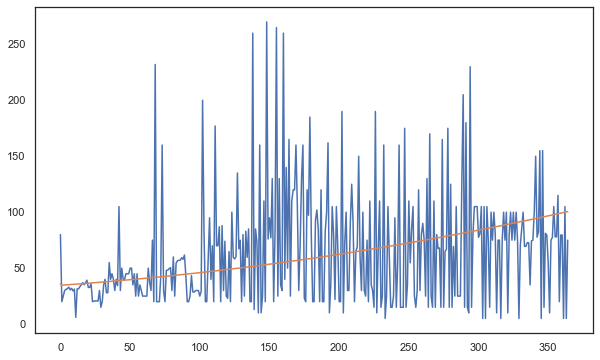

In [81]:
test1['Arrivals(Qtls)'].plot(figsize=(10,6))
test1['ypred'].plot(figsize=(10,6))
plt.show()

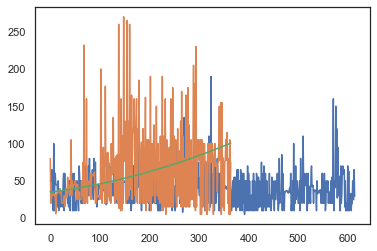

In [82]:
plt.plot(train1['Arrivals(Qtls)'], label='Train')
plt.plot(test1['Arrivals(Qtls)'], label='Test')
plt.plot(test1['ypred'], label='Prediction')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test1['Arrivals(Qtls)'],test1['ypred']))
print("ROOT MEAN SQAURED ERROR (RMSE) :",rmse)

ROOT MEAN SQAURED ERROR (RMSE) : 49.80915981788788
